In [15]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [59]:
from astropy.io import fits
from specutils import Spectrum1D
from astropy import units as u
from specutils.analysis import snr
from specutils import SpectralRegion
import pandas as pd

In [17]:
def file_name(file_dir):
    import os
    L=[]
    for root, dirs, files in os.walk(file_dir):
        for file in files:
            if os.path.splitext(file)[1] == '.fits':  
                L.append(os.path.join(root, file))
    return L

In [26]:
file = file_name('F:\学习\天体物理\data')

5001

Calculate the S/N of 5001 spectra

In [28]:
s = array([])
# SpectralRegion(3000*u.AA, 4000*u.AA)
for name in file:
    spec = Spectrum1D.read(name,format='SDSS-III/IV spec')
    s = append(s,snr(spec))

In [29]:
s.shape

(5001,)

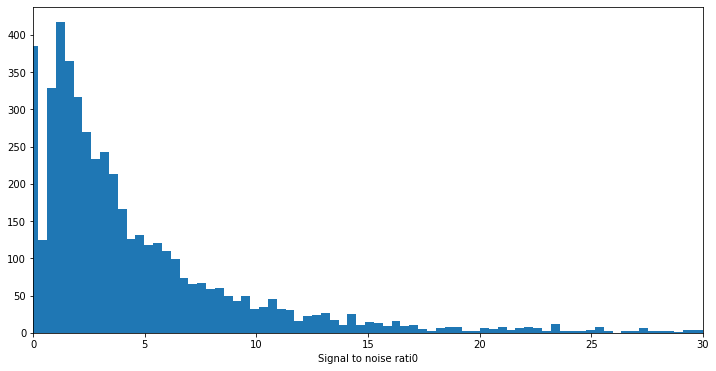

In [43]:
fig = figure(figsize = (12,6))
ax = fig.add_subplot(111)
ax.hist(s.value,bins=180)
ax.set_xlabel('Signal to noise ratio')
ax.set_xlim(0,30)
show()

In [44]:
sn = s.value
m = where(sn == max(sn))

## Find the spectrum with the highest S/N

In [55]:
spec = Spectrum1D.read(file[int(m[0])],format='SDSS-III/IV spec')
snr(spec)

<Quantity 70.28733>

In [66]:
def Readfile(inFilename):

    HduList = fits.open(inFilename)
    priHeader = HduList[1].header
    spectrumData = HduList[1].data
    spectrumColumns = HduList[1].columns.names
    dataframe = pd.DataFrame(spectrumData, columns=spectrumColumns)
    numRecords = len(dataframe.index)
    spectrumProperties = HduList[2].data
    minWavelength = spectrumProperties.field('WAVEMIN') 
    maxWavelength = spectrumProperties.field('WAVEMAX') 
    redShift      = spectrumProperties.field('z')
    wavelengthArray = np.logspace(start=np.log10(minWavelength), stop=np.log10(maxWavelength), num = numRecords, endpoint=True)
    dataframe['wavelength'] = wavelengthArray
    HduList.close()
    
    return [redShift, dataframe]

In [67]:
spec = Readfile(file[int(m[0])])

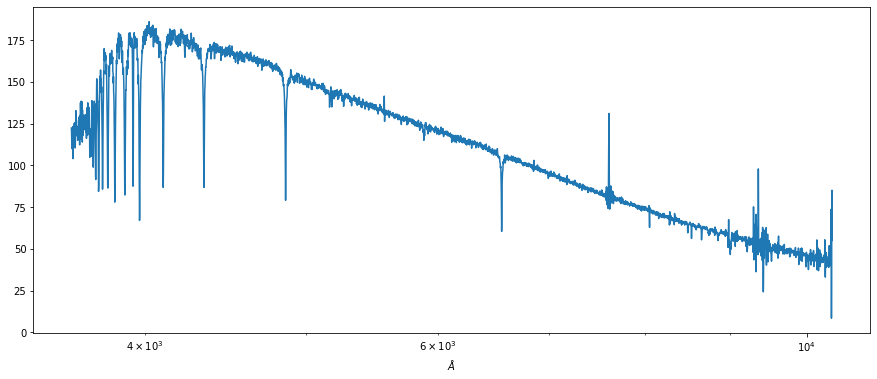

In [68]:
fig = figure(figsize = (15,6))
ax = fig.add_subplot(111)
ax.set_xscale("log")
#     ax.set_yscale("log")
ax.set_adjustable("datalim")
ax.plot(spec[1].wavelength,spec[1].flux)
ax.set_xlabel('$\AA$')
plt.show()